## Grupo

227124 Jorge Henrique Monteiro dos Santos

262251 Vitor Mello de Araujo Lima

## Objetivo

Esta tarefa busca  ...


In [133]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

# Leia

A leitura dos dados é relizada utilizando a biblioteca Pandas. Como os dados são separados por espaço em branco, é necesasario especificar o parametro sep. Além disso, como a primeira linha não faz parte do conjunto dados e não há um linha com os nomes dos atributos, foi especificado o parametro names e o header.


In [134]:
url = "https://www.ic.unicamp.br/~wainer/cursos/1s2021/432/solar-flare.csv"
names = ["Class","Largest spot size","Spot distribution", "Activity", "Evolution", "Prv 24h flare activity", "Historically-complex", 
        "Complexixity change in sun's disk", "Area", "Largest Spot Area", "C-Class", "M-Class", "X-Class" ]
data = pd.read_csv(url,sep = " ", header = 0, names = names)

In [135]:
data.shape

(1066, 13)

## Primeira linha

In [136]:
data.head(1)

,Class,Largest spot size,Spot distribution,Activity,Evolution,Prv 24h flare activity,Historically-complex,Complexixity change in sun's disk,Area,Largest Spot Area,C-Class,M-Class,X-Class
0,H,A,X,1,3,1,1,1,1,1,0,0,0


## Ultima Linha

In [137]:
data.tail(1)

,Class,Largest spot size,Spot distribution,Activity,Evolution,Prv 24h flare activity,Historically-complex,Complexixity change in sun's disk,Area,Largest Spot Area,C-Class,M-Class,X-Class
1065,B,X,O,1,1,1,1,2,1,1,0,0,0


# Converta os atributos categóricos para numéricos

In [138]:
Class = pd.get_dummies(data['Class'], prefix='Class')
#print(Class.head())

largSpotSize = pd.get_dummies(data['Largest spot size'], prefix='Larg_spot_size')
#print(largSpotSize.head())

spotDistr = pd.get_dummies(data['Spot distribution'], prefix='Spot_distr')
#print(spotDistr.head())

data_num = pd.concat([data,Class,largSpotSize,spotDistr], axis=1)
data_num.drop(['Class', 'Largest spot size','Spot distribution' ],axis=1, inplace=True)

data_num.head()

,Activity,Evolution,Prv 24h flare activity,Historically-complex,Complexixity change in sun's disk,Area,Largest Spot Area,C-Class,M-Class,X-Class,...,Larg_spot_size_A,Larg_spot_size_H,Larg_spot_size_K,Larg_spot_size_R,Larg_spot_size_S,Larg_spot_size_X,Spot_distr_C,Spot_distr_I,Spot_distr_O,Spot_distr_X
0,1,3,1,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


# Centering and scaling
Faça o centering and standard scaling para todos os atributos de entrada (convertidos para numéricos)

In [139]:
#Separate input and output data
output_data_columns = ["C-Class", "M-Class", "X-Class"]
output_data_num = data_num.loc[:, output_data_columns]

assert output_data_num.shape[1] == 3
assert output_data_num.shape[0] == data_num.shape[0]
assert set(output_data_columns).issubset(output_data_num)

input_data_num = data_num.drop(output_data_columns, axis=1, inplace=False)

assert input_data_num.shape[0] == data_num.shape[0]
assert input_data_num.shape[1] == (data_num.shape[1]-3)
assert not set(output_data_columns).issubset(input_data_num) 



In [168]:
from sklearn.preprocessing import StandardScaler

data_scaled = DataFrame(StandardScaler().fit_transform(input_data_num), columns=input_data_num.columns)
data_scaled.head()

## Quick check of mean and std
assert  np.mean(data_scaled.Area)     < 1e-15
assert (np.std(data_scaled.Area) - 1) < 1e-15



In [167]:
print(data_scaled.columns)

Index(['Activity', 'Evolution', 'Prv 24h flare activity',
       'Historically-complex', 'Complexixity change in sun's disk', 'Area',
       'Largest Spot Area', 'Class_B', 'Class_C', 'Class_D', 'Class_E',
       'Class_F', 'Class_H', 'Larg_spot_size_A', 'Larg_spot_size_H',
       'Larg_spot_size_K', 'Larg_spot_size_R', 'Larg_spot_size_S',
       'Larg_spot_size_X', 'Spot_distr_C', 'Spot_distr_I', 'Spot_distr_O',
       'Spot_distr_X'],
      dtype='object')


# PCA
Reduza a dimensionalidade dos atributos de entrada usando PCA.

## Quantas dimensões restarão se mantivermos 90% da variância dos dados?



In [169]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_scaled)

variance_cum_sum = np.cumsum(pca.explained_variance_ratio_)


In [210]:
variance_until_90 = variance_cum_sum[variance_cum_sum<=0.90]
n_dim = variance_until_90.size
print("Restarão {} dimensões se mantivermos 90% da variância".format(n_dim))

## Testing:
# Cumulative sum after n elements (0:n-1)  <= 90%
assert (variance_cum_sum[n_dim-1] < 0.9)

# Cumulative after n+1 elements (0-n) should be >= 90%
assert(variance_cum_sum[n_dim] > 0.9)

print(variance_cum_sum[n_dim-1:n_dim+1])

# Total is 1
assert variance_cum_sum[variance_cum_sum.size-1] - 1 < 1e-15

Restarão 12 dimensões se mantivermos 90% da variância
[0.89148517 0.91693329]


## Use o _Scree Plot_ para determinar quantas dimensões devem ser mantidas

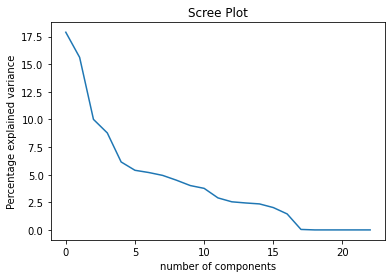

In [176]:
plt.plot(pca.explained_variance_ratio_*100)
plt.xlabel('number of components')
plt.ylabel('Percentage explained variance')
plt.title("Scree Plot")
plt.show()

O Scree Plot mostra que os componentes a partir do 17 tem contribuição mínima para a variância. Utilizando essa estrategia, o numero de dimensões escolhido seria 16.

## Converta os dados usando o PCA com 90% das variância.



In [200]:
reduced_data = PCA(n_components=n_dim).fit_transform(data_scaled)


print("O conjunto de dados foi reduzido para 90% da variância, continua com {} linhas, mas apenas {} colunas, relativas aos \
{} componentes de maior variâcia.".format(reduced_data.shape[0], reduced_data.shape[1], n_dim))

O conjunto de dados foi reduzido para 90% da variância, continua com 1066 linhas, mas apenas 12 colunas, relativas aos 12 componentes de maior variâcia.


# Validação cruzada e regreção linear

Nessa etapa, faz-se 5 repetições de validação cruzada aleatória, utilizando conjuntos de treino com 70% e conjuntos de teste com 30%.

Utiliza-se uma regressão linear para cada um dos três atributos de saída.

Exibe-se ao final o RMSE e MAE para cada uma das 5 regressões lineares.

In [290]:
def calc_rmes(actual, prediction):
    return ( (actual-prediction)**2 ).sum()/actual.shape[0]

def calc_mae(actual, prediction):
    return ( (actual-prediction).abs() ).sum()/actual.shape[0]


In [451]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def calc_rmes_mae (input_data_, output_data_):
    l_rmes = []
    l_mae  = []

    for i in range(5):
        # Create test and train sets
        x_train,x_test,y_train,y_test=train_test_split(input_data_, output_data_, test_size=0.3)

        assert (x_test.shape[0] + x_train.shape[0]) == reduced_data.shape[0]
        assert (y_test.shape[0] + y_train.shape[0]) == reduced_data.shape[0]

        lreg = LinearRegression().fit(x_train, y_train)

        l_rmes.append( calc_rmes(y_test, lreg.predict(x_test)) )
        l_mae.append(  calc_mae( y_test, lreg.predict(x_test)) )
    
    return l_rmes, l_mae

def print_tables(measure, cols):
    table = pd.DataFrame(columns=cols)
    for col in cols:
        table[col] = np.append(np.array(error_measures.at[measure, col]), np.mean(np.array(error_measures.at[measure, col])))
    table.index = [0, 1, 2, 3, 4, 'Avg']
    print("---------------{}---------------".format(measure))
    print(table)
    print("---------------------------------")
    
# Get the measures
error_measures = pd.DataFrame(columns=output_data_columns)
for col in output_data_columns:
    error_measures[col] = calc_rmes_mae(reduced_data, output_data_num[col])
error_measures.index = ["RMES", "MAE"]

# Print them in columns
print_tables("RMES", output_data_columns)

print_tables("MAE", output_data_columns)


---------------RMES---------------
      C-Class   M-Class   X-Class
0    0.591627  0.106883  0.006384
1    0.586580  0.029098  0.004031
2    0.474856  0.190454  0.004786
3    0.631789  0.033449  0.016905
4    0.439261  0.040474  0.002936
Avg  0.544823  0.080072  0.007008
---------------------------------
---------------MAE---------------
      C-Class   M-Class   X-Class
0    0.419813  0.099450  0.018882
1    0.432257  0.082754  0.016088
2    0.401792  0.108094  0.013324
3    0.443358  0.081884  0.017914
4    0.396055  0.080456  0.013359
Avg  0.418655  0.090528  0.015913
---------------------------------
